# Assignment 4: Vegetation and the Landscape

(YOUR NAME HERE)

(TODAY'S DATE HERE)

*In solving each of the problems below, please include text comments and description for your future self, so that when you look back you'll have notes on how you solved these problems!*

# Background: Raster Bands and NDVI
In this assignment you will investigate how different topographic metrics correspond to vegetation.  To do so, we will calculate the **normalized difference vegetation index** (**NDVI**) in an area around Boulder.  Plant leaves do not absorb light in the near-infrared part (NIR)  of the electromagnetic spectrum.  In contrast [chlorophyll is most effecient at capturing red light](https://en.wikipedia.org/wiki/Photosynthetically_active_radiation).  This means if you were to look at the radiation signature of an area with lots of plants, it would be emititng lots of NIR and little red light.   From this idea we get [NDVI](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index):

$$ \text{NDVI}=\frac{(\text{NIR}-\text{Red})}{(\text{NIR}+\text{Red})}$$

[Landsat](https://en.wikipedia.org/wiki/Landsat_program) is a series of satellites that have been circling the earth since the early 70s.  The sensors on the Landsat sattelites collect (among other things) grids of the ammount of Blue, Green, and Red light (what your phone camera collects!) and NIR radiation reflected from the surface of the Earth.  We call each set of the spectrum captured a "band" of data.  So the "blue band" of a Landsat gird is grid of numbers that reflects the ammount of blue light reflected at each point on the surface.  We can use this to calculate NDVI for every cell of a Landsat grid.  Each cell of a Ldndsat is like a pixel in a photograph, but it corresponds to a sectio of the surface of the earth.

There is more detail on rasters, imagary, and light in the appendix at the bottom of the notebook.

# Part 1: Reading in data and making maps
Along with this notebook there are the follwing files:
* `mountain_blue.tif` - the blue band of our landsat grid
* `mountain_green.tif`- the green band of our landsat grid
* `mountain_red.tif` - the red band of our landsat grid
* `mountain_nir.tif` - the NIR band of our landsat grid
* `mountain_dem.tif` - A DEM of the same area covered by the Landsat grid
All data files have the UTM zone 13N coordinate system.  Which means that units are in meters.  Each pixel is 30 meters wide.
  
*Write a function that will take a landsat band as input, and make an appropriately labeled image plot of that band.  Run that for all 4 Landsat bands.  Note that if you want to run your function using  a loop, you may have trouble displaying all plots.  You are encouraged the consult the web if you would like to go this route.*

# Part 2: Calculating NDVI
*Write a function that takes numpy arrays representing the red and NIR bands of a Landsat grid, and returns a new array representing a map the NDVI.  Run this function and make a plot of the resulting NDVI*

# Part 3: Calculating slope
*Write a program that takes the DEM as an input parameter and calculates a slope array.  Make a plot of the slope array*

# Part 4: Relationships between datasets
Now we have an array that represents vegation (NDVI) as well as elevation and slope.  
*Write one-two sentances on how you think NDVI will relate to elevation and slope.*

*Write a program that uses Matplotlib to make labeled scatter plots of how NDVI varries with elevation and slope.  Hint: every array represents a 30m by 30m square of land and each array covers the same ammount of area.  What does that mean about the first entry of every array?*

# Part 5: Aspect (for graduate students, or as a bonus point)
In notebook 14 there were other ways to process DEMs that we didn't get to.  We will use one of these: Aspect.

*Write a program that calculates aspect for your DEM, and makes a plot of how NDVI varries with aspect*

# Part 6: Outliers (for graduate students, or as a bonus point)
You may have noticed that there are some outlier NDVI values which are impacting your plot.  This could be related to water, which usually has a very high NDVI value (why might that be?).  If this is water, than those values aren't telling you anything about vegetation, so it would be nice to exclude.  One way we can do so is with a **masked array** in `numpy`.  A masked array is a numpy array with the value blanked or masked out at certain parts.  You can typically use them just like arrays but the masked values will be ignored.  

*Take a look at the documentation for the functions in the masked array module in numpy: https://numpy.org/doc/stable/reference/routines.ma.html
Find a function that will generate a masked array from your NDVI array with values above an outlier value you determine masked out.  Redo your plots from parts 4 and 5 with this masked array.*

# Part 7: Maps (bonus point for all)
Now that we have a few different data grids, we can combine them together and make maps.  It turns out that if we call `plt.imshow()` twice in a row, it plots the two images on top of each other.  We can exploit that by making our second image transparent.  This is done with the `alpha` parameter of the `imshow` function.  We can also set the boundaries of our plot so that they are meaningful and unitful instead of rows and columns.  We can do this by passing a list of values as the `extent` parameter when we call `imshow`.

*In the code cell below, use the provided function to create a hillshade from the DEM.  Then plot that and a semitransparent NDVI image together.  Set the extent based on the actual location of our data.  Finally, label the axes appropriately.  You will need to know that the latitude and longitude of the top left is (40.2449,-105.6885) and the latitude and longitude of the bottom right is (39.9578,-105.3314).*

In [ ]:
def hillshade(z, azimuth=315.0, angle_altitude=45.0):
    """Generate a hillshade image from DEM.

    Notes: adapted from example on GeoExamples blog,
    published March 24, 2014, by Roger Veciana i Rovira.
    """
    x, y = np.gradient(z)
    slope = np.pi / 2.0 - np.arctan(np.sqrt(x**2 + y**2))  # slope gradient
    aspect = np.arctan2(-x, y)  # aspect
    azimuthrad = azimuth * np.pi / 180.0  # convert lighting azimuth to radians
    altituderad = angle_altitude * np.pi / 180.0  # convert lighting altitude to radians
    shaded = np.sin(altituderad) * np.sin(slope) + np.cos(altituderad) * np.cos(
        slope
    ) * np.cos(azimuthrad - aspect)
    return 255 * (shaded + 1) / 2  # return result scaled 0 to 255

# Appendix

# How Computers Represent Photographs
An photograph is a recording of light reflected off something (typically refered to as a scene).  When a human observes something visually, it is light reflected off objects that activates specialized cells in the retina.  Photographs work the same way, using a variety of technologies to substitute for the cells of the retina.  Traditional film photography uses a film full of light-sensitive silver salt crystal, part of which becomes metallic silver when exposed to light.  Digital photography uses an array of photosensitive circuits that record the ammount of light.  In either case, what you are left with is (typically but not necessarily) a rectangle that represents the amount of light reflected from a captured scene.
## Rasters
The result of a digital image is called a "raster" an array of values representing the ammount of light at each position.  Below is a sample raster repreented in python as a list of lists of integers.  The first list is the upper row of pixels in our image.  The top left pixel has a value of 255, meaning very bright.  The bottom right has a value of 60, rather dark. 

In [ ]:
image = [[255,200,180,180,180],
         [200,200,100,100,100],
         [180,180,80, 100, 80],
         [170,170,70, 100, 60],
         [160,160,60, 100, 60]]

A typical pixel in a computer image will have values that range from 0 to 255.  Think about what we learned about how computers represent numbers.  What does this mean about the underlying data structure of a pixel?

In python we can view images with a library called "matplotlib".  Matplotlib can do lots of things including make many different types of graphs.  Now we'll use the imshow function to display our image above.

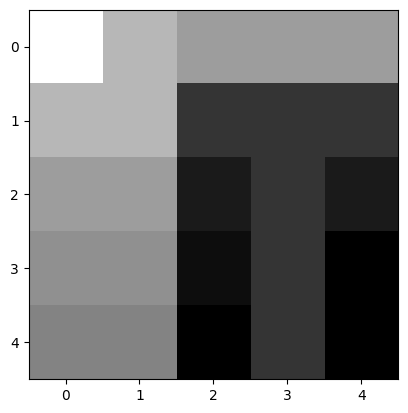

In [26]:
plt.imshow(image, cmap="gray")

Now, try to make you own "image" using a list of lists, and display it with matplotlib.

## Color photography
The sensors (silver salt or digitial circuit) record the *ammount* of light that hit them, not necessarily the *color* of light.  So how do we get color images?  Humans see color because specific types of cells in the retina are sensitive to specific wavelengths of light.  Humans are sensitive to red, green, and blue light (see below).
![human color sensitivity](https://upload.wikimedia.org/wikipedia/commons/f/f1/1416_Color_Sensitivity.svg)
Our eyes take in the ammount of red, green, and blue light in what we see, and construct color based on that.  We can mimic that with a digital image by recording the ammount of red, green, and blue light.  This can be done by filtering out different types of light, but you can think of a digital camera as, like an eye, having three different types of sensors.  When a computer displays an image, rather than each pixel representing a certain ammount of light, like in our example above, each "pixel" is three lights, one red, one green, and one blue.  Each light as a brightness that corresponds to the relative ammount of that color light in that part of the scene.  Put your phone screen under a microscope sometime, you'll see that it's actually made up of a bunch of red, green,. and blue lights!
### Color rasters
But how do we store this on a computer?  Whereas before, we had a list of lists, or an array where each value was the ammount of light reflected from a scene, instead we could have each value be a tuple contaning the ammount of red, green, and blue light!

pixel = (120, 0, 120)

This would lead us to an image that would be something like this:

In [2]:
color_image = [[(120, 0, 120), (120, 10, 120), (120, 20, 120)],
               [(130, 0, 120), (120, 10, 130), (130, 20, 130)],
               [(140, 0, 120), (130, 10, 130), (140, 20, 140)]]

Typically, for reasons that aren't important now, instead of images being stored as 2d arrays of tuples of 3, they are stored as 3 2d arrays, each array representing a different type of light, often called a "band".

## From images to spectral data
Sure humans typically only distinguish between red, green, and blue light, but we can build sensors to distinguish between all sorts of different parts of the electromagnetic spectrum.
![the electromagnetic spectrum](https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Electromagnetic-Spectrum.svg/1024px-Electromagnetic-Spectrum.svg.png)
A common "band" of the spectrum of interest to a wide range of scientists is the "infrared" section, netween visible light and radio waves.  This section of the spectrum can capture thermal radiation, like the heat off of a body (ever seen a picture from "night vision" goggles?" and has a wide range of applications, including vegetation health.

The satellite (Landsat 8) that captured the satellite image near Boulder contains a few bands beyond the visible spectrum.  We've included the near infrared band, but read about the Landsat satelite and other bands it includes.  Do you have any ideas about how you could use other bands?